In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline

In [2]:
music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

neighbors.predict([[24, 190]])

poi = [24,190]

In [4]:
shortest_distance = 1000

for i in range (0, len(music['duration'])):
    distance = math.sqrt(((poi[0] - music['duration'][i])**2)+((poi[1] - music['loudness'][i])**2))
    if distance < shortest_distance:
        shortest_distance = distance
        position = i

print(shortest_distance)
print(i)

163.45335726133007
29


In [5]:
prediction = music['jazz'][position]

if prediction == 0:
    print('rock')
else:
    print('jazz')

rock


Now, to play around with mesh size.

In [37]:
X = np.array(X)
Y = np.array(Y)

def play_with_mesh(mesh_size):

    h = mesh_size

    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z)

    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualization')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

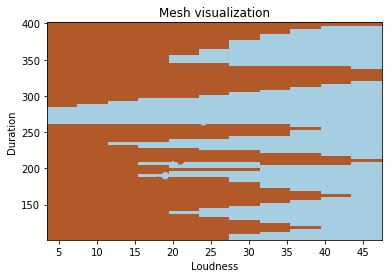

In [38]:
play_with_mesh(4)

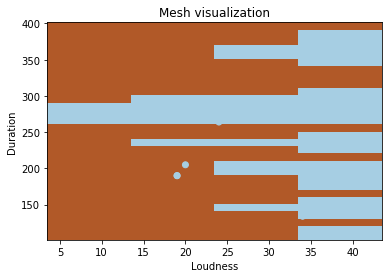

In [10]:
play_with_mesh(10)

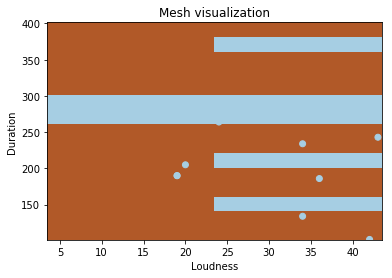

In [12]:
play_with_mesh(20)

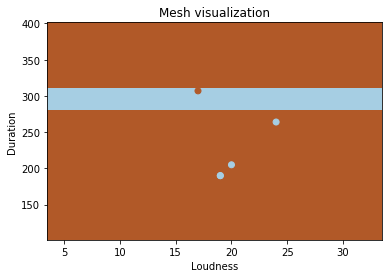

In [16]:
play_with_mesh(30)

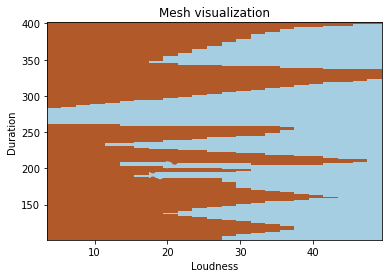

In [17]:
play_with_mesh(2)

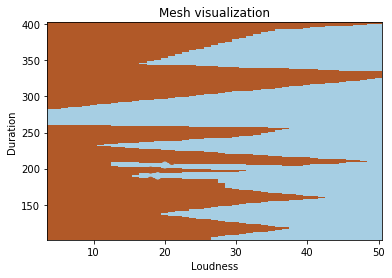

In [18]:
play_with_mesh(1)

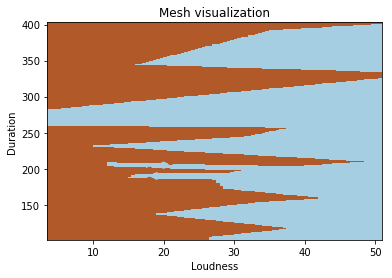

In [19]:
play_with_mesh(0.5)

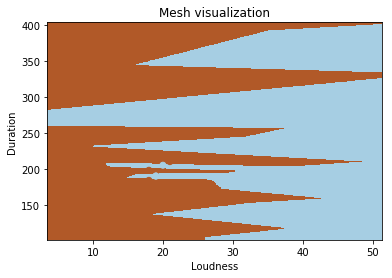

In [23]:
play_with_mesh(0.2)

As you bring the number down, the computation time doesn't get too slow, so I would favor a smaller mesh size. As you bring the number up, the model becomes too simplistic and it hardly saves any computation time. This might change for a larger dataset, though.

In [24]:
print(X)

[[ 18 184]
 [ 34 134]
 [ 43 243]
 [ 36 186]
 [ 22 122]
 [  9 197]
 [ 29 294]
 [ 22 382]
 [ 10 102]
 [ 24 264]
 [ 20 205]
 [ 10 110]
 [ 17 307]
 [ 51 110]
 [  7 397]
 [ 13 153]
 [ 19 190]
 [ 12 192]
 [ 21 210]
 [ 22 403]
 [ 16 164]
 [ 18 198]
 [  4 204]
 [ 23 253]
 [ 34 234]
 [ 19 190]
 [ 14 182]
 [ 11 401]
 [ 37 376]
 [ 42 102]]
